<a href="https://colab.research.google.com/github/sajithgowthaman/Datasciencecoursera/blob/master/Model_Preparation_Project_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

### First, load the dataset.

### Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

### Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

### In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

### Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.    

## Load Data from the Thinkful Database

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy', con=engine)

## We only require the engine to be operating once to open the database.
engine.dispose()

In [0]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### STEP 2 Analyze the problems that could possibly occur. 

#### Let's refer to the kaggle website that contains better information about the dataset.

From the Dataset information found in kaggle, the column names such as under-five deaths, Measles, HIV, infant deaths and Adult mortality are the rates per 1000. Our data must contain values that are below df['col'].count() < 1000 in those cases.

We find few int and object variables in the dataset that needs to be converted. Also, note the null values which has to be reomved.

## STEP 3
### Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [0]:
df.isnull().sum()*100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo


It can be seen that the null values are present in almost half of the variables from 0 to maximum 22% in the population.

In [0]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace('/','_')   

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_expectancy_                   2928 non-null float64
Adult_Mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
Hepatitis_B                        2385 non-null float64
Measles_                           2938 non-null int64
_BMI_                              2904 non-null float64
under_five_deaths_                 2938 non-null int64
Polio                              2919 non-null float64
Total_expenditure                  2712 non-null float64
Diphtheria_                        2919 non-null float64
_HIV_AIDS                          2938 non-null

#### We have three integer variables that has to be transformed. The objects that are present "country" and "status" are non numeric, so they can be allowed.

In [0]:

## Run each line separate to find the fault in having more than 1000 values for variables that cant have more than 1000 values.

#df[df.Adult_Mortality > 1000] ## No mortality over 1000 
#df[df.infant_deaths> 1000] ##There appears to be deaths greater than 1000
#df[df.Measles_>1000] ## There appears to be values greater than 1000
#df[df.under_five_deaths_>1000] ## There appears to be values greater than 1000
df[df._HIV_AIDS>1000] ## No deaths over 1000

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV_AIDS,GDP,Population,_thinness__1_19_years,_thinness_5_9_years,Income_composition_of_resources,Schooling


In [0]:
## Replace the values with nan and then 
for col in ['infant_deaths', '_HIV_AIDS', 'Measles_', 'under_five_deaths_']:
    df.loc[df[col] >=1000, col] = np.nan

In [0]:
## Now dealing with the null values for every country, lets create a list that has all the columns and then interpolate them.

fill_list = ['Life_expectancy_', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B', '_BMI_', 'Polio', 'Total_expenditure', 'Diphtheria_', 'GDP', 'Population', '_thinness__1_19_years', '_thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']
countries = df['Country'].unique()

## Interpolation for filling in the missing values:
for fill in fill_list:
    for country in countries:
        df.loc[df["Country"] == country, fill] = df.loc[df["Country"] == country, fill].interpolate(limit_direction = 'both')

df.isnull().sum()/df.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life_expectancy_                   0.003404
Adult_Mortality                    0.003404
infant_deaths                      0.004765
Alcohol                            0.005786
percentage_expenditure             0.000000
Hepatitis_B                        0.049013
Measles_                           0.178693
_BMI_                              0.011572
under_five_deaths_                 0.005446
Polio                              0.000000
Total_expenditure                  0.010892
Diphtheria_                        0.000000
_HIV_AIDS                          0.000000
GDP                                0.137849
Population                         0.220558
_thinness__1_19_years              0.011572
_thinness_5_9_years                0.011572
Income_composition_of_resources    0.056841
Schooling                          0.055480
dtype: float64

In [0]:
df.dropna(inplace = True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 2936
Data columns (total 22 columns):
Country                            1718 non-null object
Year                               1718 non-null int64
Status                             1718 non-null object
Life_expectancy_                   1718 non-null float64
Adult_Mortality                    1718 non-null float64
infant_deaths                      1718 non-null float64
Alcohol                            1718 non-null float64
percentage_expenditure             1718 non-null float64
Hepatitis_B                        1718 non-null float64
Measles_                           1718 non-null float64
_BMI_                              1718 non-null float64
under_five_deaths_                 1718 non-null float64
Polio                              1718 non-null float64
Total_expenditure                  1718 non-null float64
Diphtheria_                        1718 non-null float64
_HIV_AIDS                          1718 no

We can see that the null values have been removed by the interpolation process making them all floats. (except Year, Country and Status)

#### Lets check for outliers, and then winsorize them to eliminate them.

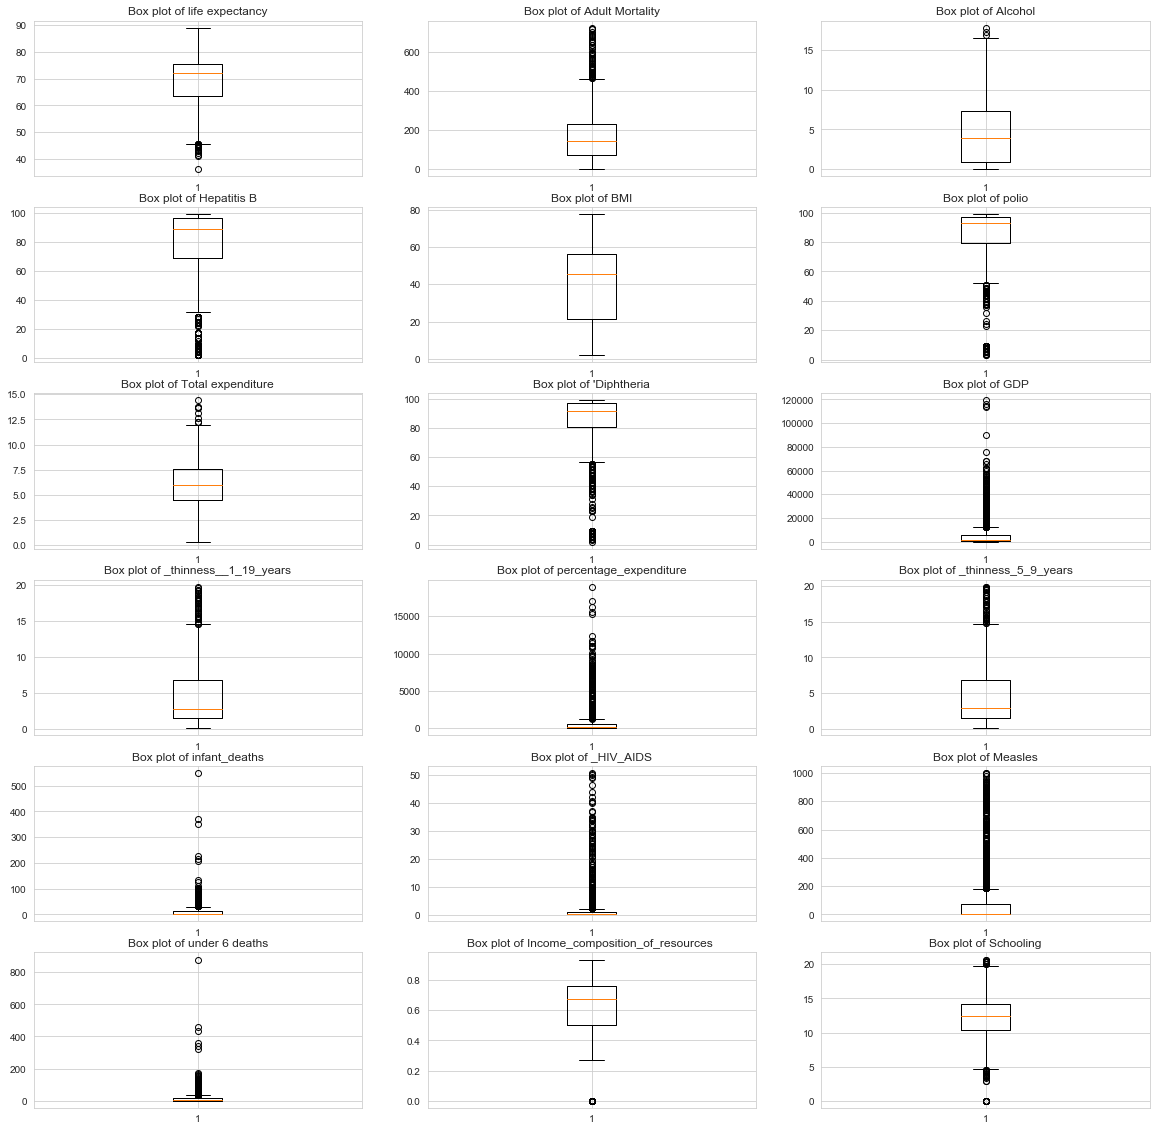

In [0]:
plt.figure(figsize = (20,20))

plt.subplot(6,3,1)
plt.boxplot(df["Life_expectancy_"])
plt.title("Box plot of life expectancy")


plt.subplot(6,3,2)
plt.boxplot(df["Adult_Mortality"])
plt.title("Box plot of Adult Mortality")


plt.subplot(6,3,3)
plt.boxplot(df["Alcohol"])
plt.title("Box plot of Alcohol")


plt.subplot(6,3,4)
plt.boxplot(df['Hepatitis_B'])
plt.title("Box plot of Hepatitis B")


plt.subplot(6,3,5)
plt.boxplot(df['_BMI_'])
plt.title("Box plot of BMI")

plt.subplot(6,3,6)
plt.boxplot(df['Polio'])
plt.title("Box plot of polio")


plt.subplot(6,3,7)
plt.boxplot(df['Total_expenditure'])
plt.title("Box plot of Total expenditure")


plt.subplot(6,3,8)
plt.boxplot(df['Diphtheria_'])
plt.title("Box plot of 'Diphtheria")


plt.subplot(6,3,9)
plt.boxplot(df['GDP'])
plt.title("Box plot of GDP")


plt.subplot(6,3,10)
plt.boxplot(df['_thinness__1_19_years'])
plt.title("Box plot of _thinness__1_19_years")


plt.subplot(6,3,11)
plt.boxplot(df['percentage_expenditure'])
plt.title("Box plot of percentage_expenditure")


plt.subplot(6,3,12)
plt.boxplot(df['_thinness_5_9_years'])
plt.title("Box plot of _thinness_5_9_years")


plt.subplot(6,3,13)
plt.boxplot(df['infant_deaths'])
plt.title("Box plot of infant_deaths")


plt.subplot(6,3,14)
plt.boxplot(df['_HIV_AIDS'])
plt.title("Box plot of _HIV_AIDS")


plt.subplot(6,3,15)
plt.boxplot(df['Measles_'])
plt.title("Box plot of Measles")

plt.subplot(6,3,16)
plt.boxplot(df['under_five_deaths_'])
plt.title("Box plot of under 6 deaths")


plt.subplot(6,3,17)
plt.boxplot(df['Income_composition_of_resources'])
plt.title("Box plot of Income_composition_of_resources ")


plt.subplot(6,3,18)
plt.boxplot(df['Schooling'])
plt.title("Box plot of Schooling");

plt.show()

As you can see, the outliers are found in almost every plot. We will winsorize and increase the whis level to 5 in the above data to eliminate them.

In [0]:
#Let's use Tukey's method to find the threshol value that will reduce the amount of outliers.
for i, col in enumerate(fill_list):
    q75, q25 = np.percentile((df[col]), [75 ,25])
    iqr = q75 - q25
    
for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df[col] > max_val)
        | (df[col] < min_val))[0]))
      ))

The score threshold is: 1.0
Number of outliers is: 112
The score threshold is: 1.5
Number of outliers is: 37
The score threshold is: 2.0
Number of outliers is: 8
The score threshold is: 2.5
Number of outliers is: 8
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [0]:
##Notice the outliers decrease as the threshold increases. we will now winsorize the data.

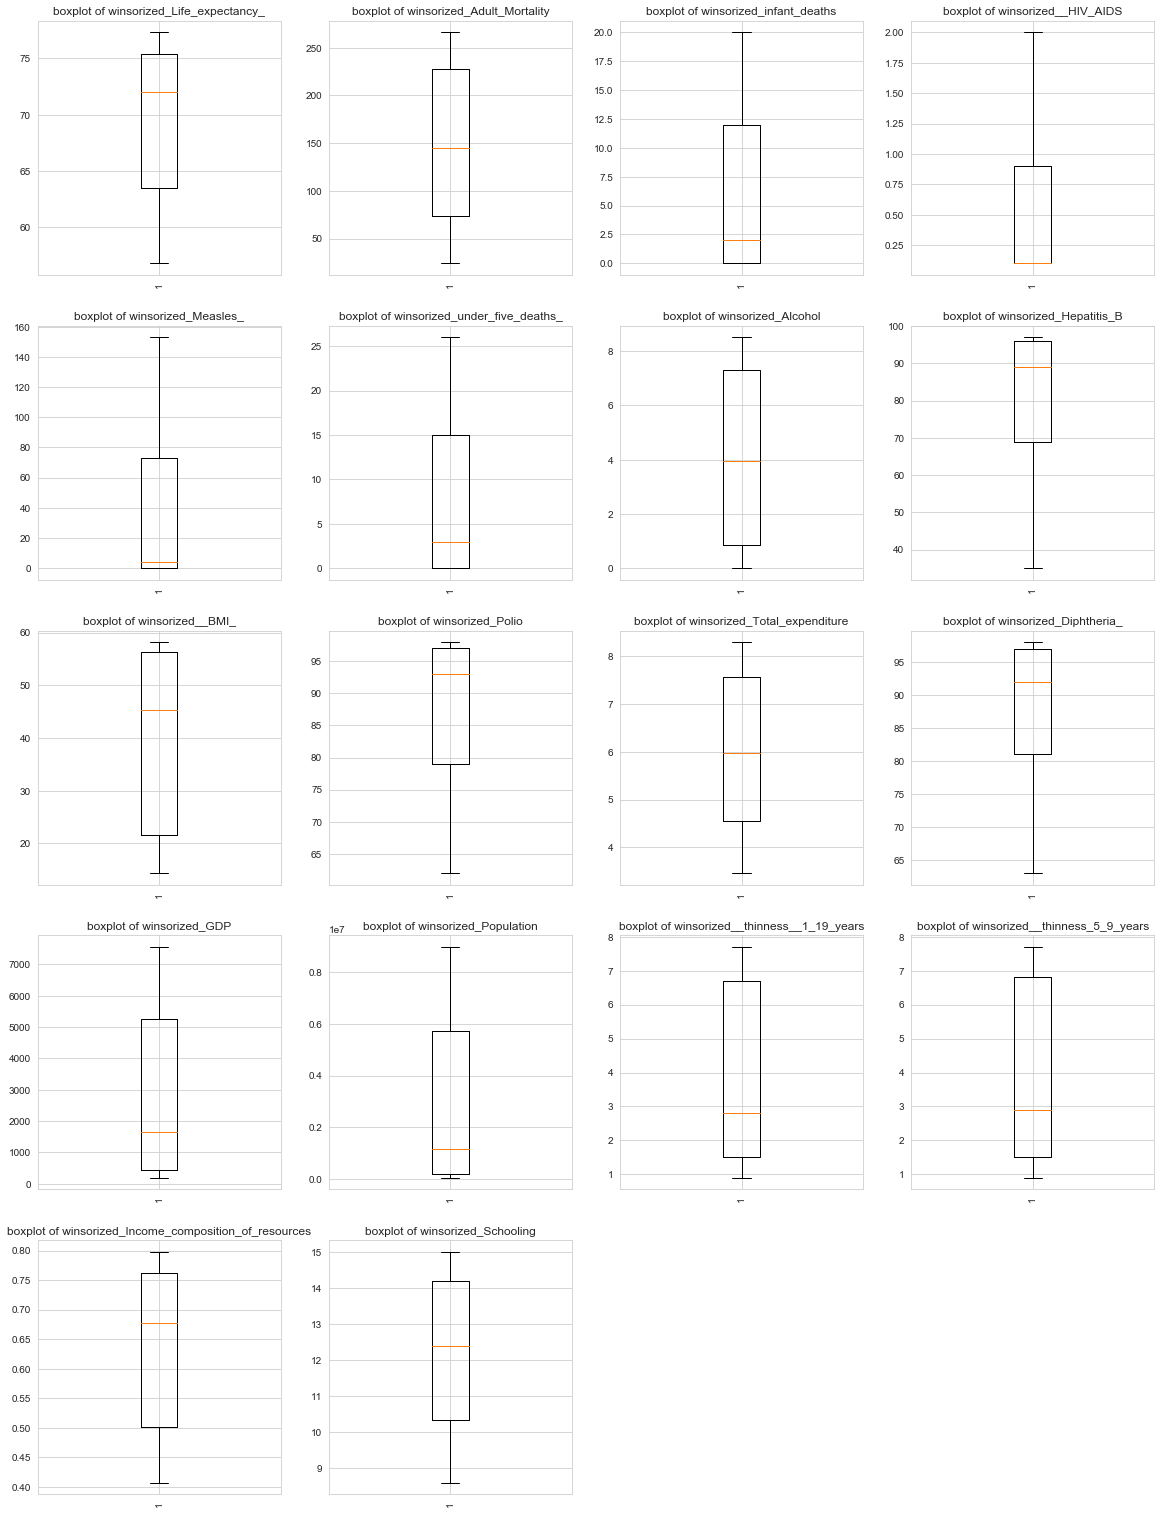

In [0]:
from scipy.stats.mstats import winsorize

import scipy.stats.mstats

df_winsor = df.copy()

winsorized_list = []

fill_list = ['Life_expectancy_', 'Adult_Mortality','infant_deaths', '_HIV_AIDS', 'Measles_', 'under_five_deaths_', 'Alcohol', 'Hepatitis_B', '_BMI_', 'Polio', 'Total_expenditure', 'Diphtheria_', 'GDP', 'Population', '_thinness__1_19_years', '_thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']


fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df_winsor['winsorized_'+ col] = scipy.stats.mstats.winsorize(df_winsor[col], (0.12, 0.18))
    winsorized_list.append('winsorized_'+ col)
    
    
    for i, col in enumerate (winsorized_list):
        plt.subplot(len(winsorized_list), 4, i+1)
        plt.boxplot(df_winsor[col])    
        plt.xticks(rotation='vertical')
        plt.title("boxplot of {}".format(col))
    

plt.show()

### After adjusting the two way winsorization, we were able to eliminate all the outliers for the variables

### step 4
Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

## Univariant Exploration
#### For this method we will plot histogram to explore the univariation.

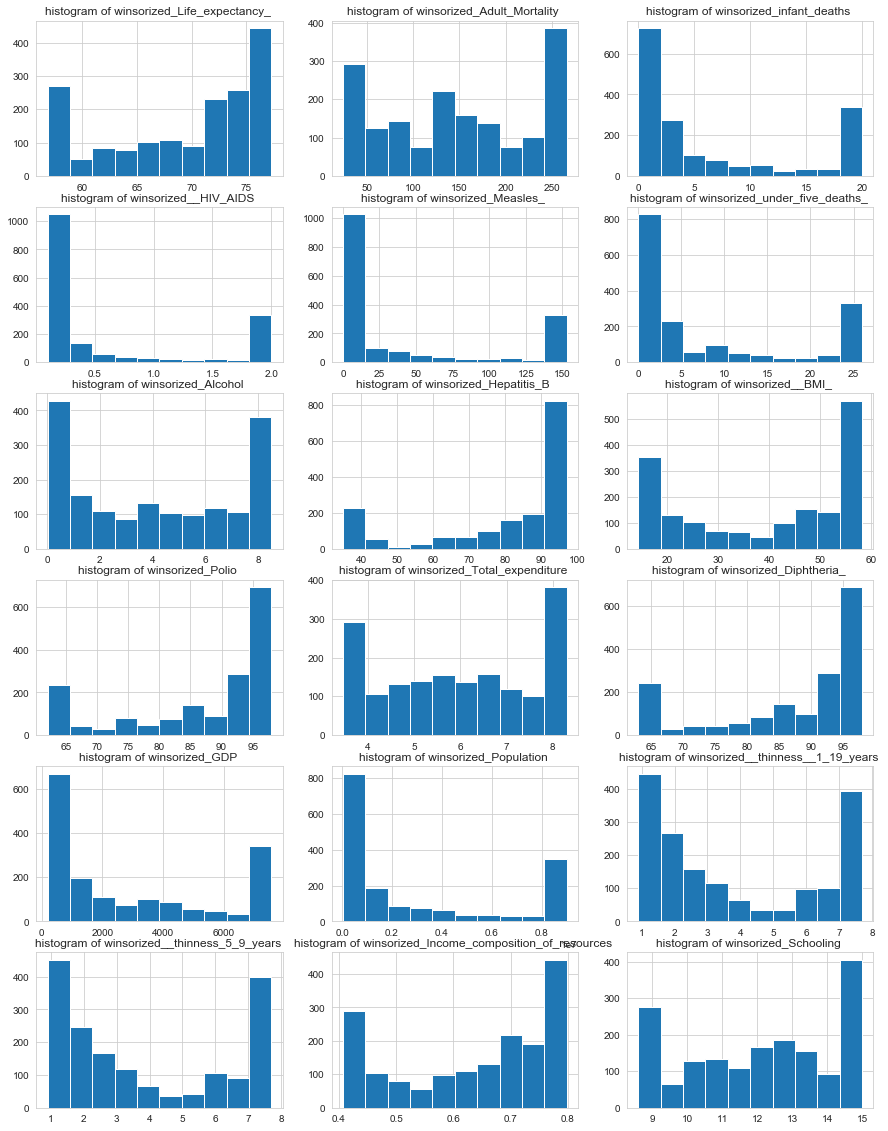

In [0]:
plt.figure(figsize=(15, 20))
for i, col in enumerate (winsorized_list):
    plt.subplot(6,3,i+1)
    plt.hist(df_winsor[col])
    plt.title("{} ".format('histogram of '+col))
plt.show()

In [0]:
df_winsor.head()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,winsorized__BMI_,winsorized_Polio,winsorized_Total_expenditure,winsorized_Diphtheria_,winsorized_GDP,winsorized_Population,winsorized__thinness__1_19_years,winsorized__thinness_5_9_years,winsorized_Income_composition_of_resources,winsorized_Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,18.6,62.0,8.18,63.0,612.696514,327582.0,7.7,7.7,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,18.1,62.0,8.13,64.0,631.744976,8991735.0,7.7,7.7,0.470,9.9
11,Afghanistan,2004,Developing,57.0,293.0,87.0,0.02,15.296066,67.0,466.0,...,14.4,62.0,8.30,63.0,219.141353,8991735.0,7.7,7.7,0.407,8.6
12,Afghanistan,2003,Developing,56.7,295.0,87.0,0.01,11.089053,65.0,798.0,...,14.4,62.0,8.30,63.0,198.728544,2364851.0,7.7,7.7,0.407,8.6
16,Albania,2015,Developing,77.8,74.0,0.0,4.60,364.975229,99.0,0.0,...,58.0,98.0,6.00,98.0,3954.227830,35217.0,1.2,1.3,0.762,14.2


## step 4. 1 multivariant exploration
### This can be explored through scattered plot and heatmap.

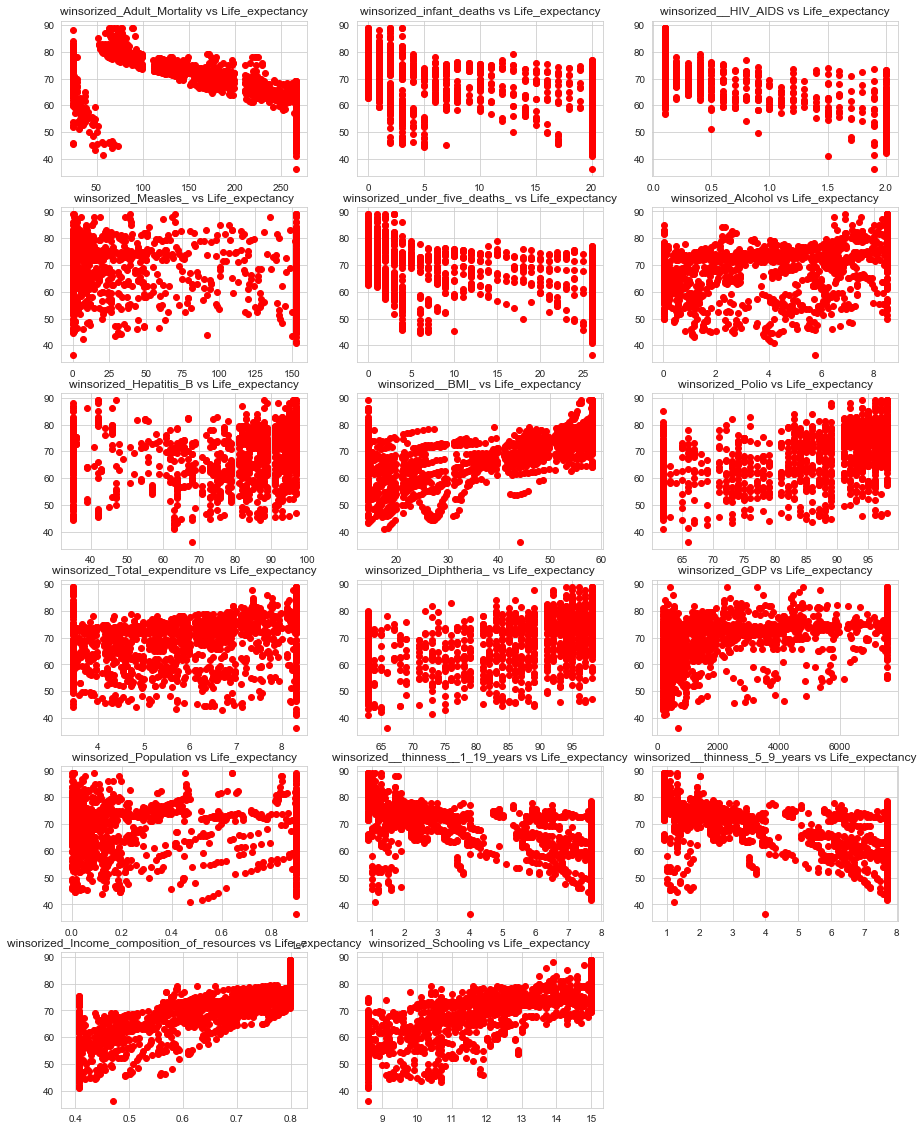

In [0]:
## We are going to take life expectancy as our target variable as we are studying how other variables impact the life expectancy

## Lets plot the target variable vs other variables to visualize the effects on life expectancy. 


plt.figure(figsize=(15, 20))
for i, col in enumerate ((winsorized_list)[1:]):
    plt.subplot(6,3,i+1)
    plt.scatter(df_winsor[col], df_winsor['Life_expectancy_'], color='r')
    plt.title("{} vs Life_expectancy".format(col))
plt.show()

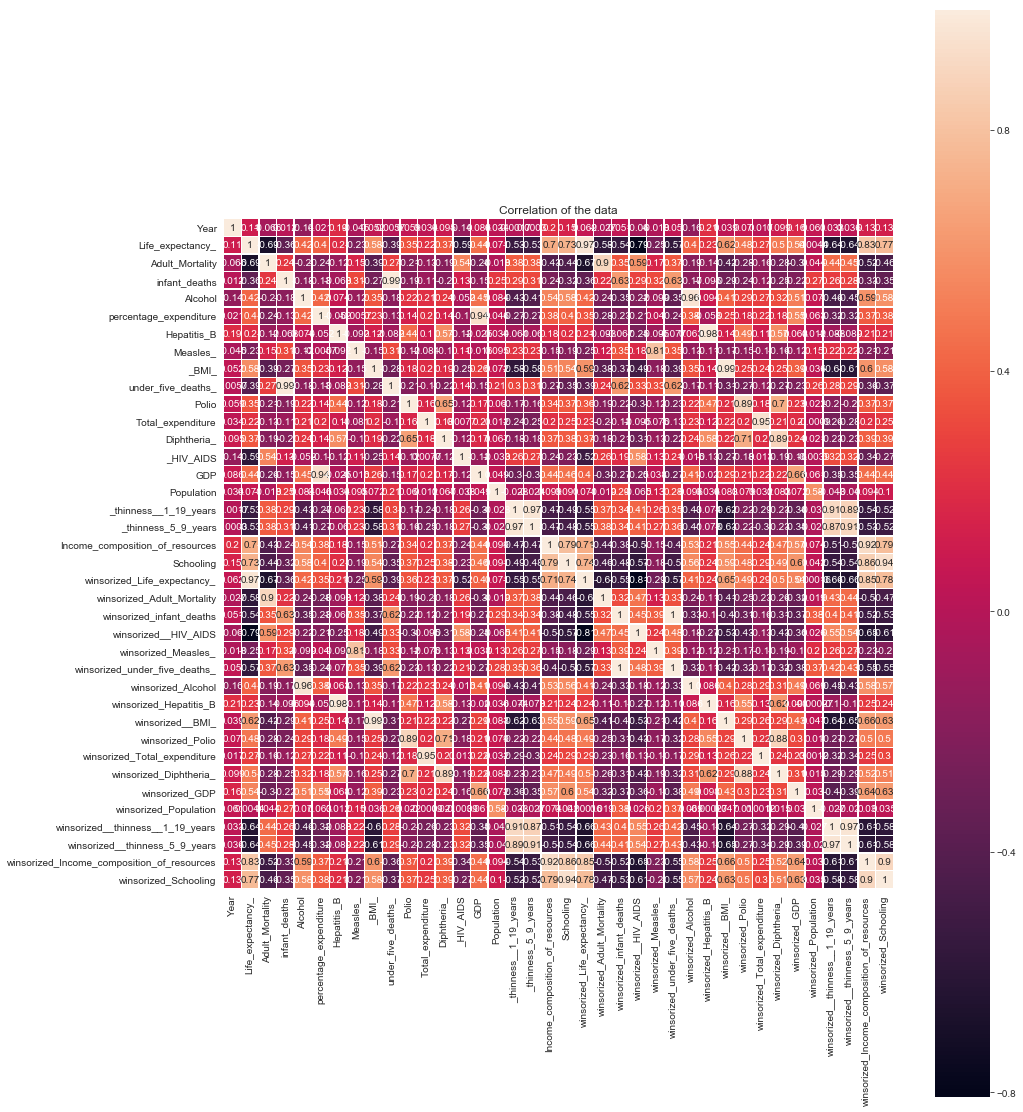

In [0]:
## Let's plot Heamap for better correlation knowledge:
plt.figure(figsize=(15, 20))
sns.heatmap(df_winsor.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation of the data")
plt.show()

In [0]:
df_winsor.corr()

,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under_five_deaths_,...,winsorized__BMI_,winsorized_Polio,winsorized_Total_expenditure,winsorized_Diphtheria_,winsorized_GDP,winsorized_Population,winsorized__thinness__1_19_years,winsorized__thinness_5_9_years,winsorized_Income_composition_of_resources,winsorized_Schooling
Year,1.000000,0.108186,-0.065684,0.012471,-0.137889,0.021057,0.189210,-0.044747,0.052213,0.005744,...,0.039260,0.070280,0.017221,0.098982,0.164442,0.060943,0.032854,0.035853,0.127136,0.126895
Life_expectancy_,0.108186,1.000000,-0.694369,-0.356887,0.418641,0.395976,0.196454,-0.232262,0.575812,-0.391684,...,0.624885,0.483450,0.269749,0.496973,0.535080,0.004370,-0.637966,-0.642148,0.825068,0.767807
Adult_Mortality,-0.065684,-0.694369,1.000000,0.244113,-0.204144,-0.239476,-0.121365,0.154848,-0.387982,0.267741,...,-0.417600,-0.277596,-0.157351,-0.277732,-0.304481,0.043939,0.441138,0.445445,-0.520872,-0.459635
infant_deaths,0.012471,-0.356887,0.244113,1.000000,-0.178186,-0.133369,-0.067988,0.309309,-0.265084,0.989880,...,-0.290611,-0.244663,-0.124490,-0.245177,-0.221978,0.269076,0.261537,0.279174,-0.332457,-0.345852
Alcohol,-0.137889,0.418641,-0.204144,-0.178186,1.000000,0.420572,0.073546,-0.119304,0.354767,-0.176916,...,0.405151,0.292017,0.270075,0.316631,0.512054,0.069776,-0.456327,-0.445019,0.593322,0.584153
percentage_expenditure,0.021057,0.395976,-0.239476,-0.133369,0.420572,1.000000,-0.052225,-0.005701,0.228122,-0.132216,...,0.248413,0.175489,0.221533,0.184578,0.548804,0.062816,-0.319498,-0.320989,0.373291,0.378980
Hepatitis_B,0.189210,0.196454,-0.121365,-0.067988,0.073546,-0.052225,1.000000,-0.092488,0.124956,-0.082311,...,0.137785,0.494678,0.114054,0.566407,0.068482,0.012285,-0.087724,-0.089493,0.208145,0.207559
Measles_,-0.044747,-0.232262,0.154848,0.309309,-0.119304,-0.005701,-0.092488,1.000000,-0.148949,0.311427,...,-0.173840,-0.152724,-0.104914,-0.162175,-0.120309,0.153735,0.215068,0.215088,-0.211506,-0.210008
_BMI_,0.052213,0.575812,-0.387982,-0.265084,0.354767,0.228122,0.124956,-0.148949,1.000000,-0.283330,...,0.985199,0.249322,0.239714,0.253788,0.387969,0.036032,-0.599527,-0.612665,0.600153,0.580547
under_five_deaths_,0.005744,-0.391684,0.267741,0.989880,-0.176916,-0.132216,-0.082311,0.311427,-0.283330,1.000000,...,-0.312387,-0.268117,-0.124778,-0.270562,-0.233652,0.257853,0.275614,0.291902,-0.359859,-0.366490


### The dark shade of the map represents the negative effect and the light shade shows the increase in life expectancy

we can see from the plot that BMI, HIV, Alcohol, Thinness, Adult mortality and under five deaths have A NEGATIVE impact on life expectancy. While winsorized schooling and income composition of resources had a good impact on life expectancy. 

### 5. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

#### We  will  continue  our  analysis  with  boxcox  statistical  tests:

In [0]:
## We will investigate those variables who have high correlation with life expectancy. 
## They are: BMI, HIV, Alcohol, Thinness, Adult mortality, under five deaths, schooling and income composition
import scipy.stats as stats
from scipy.stats import boxcox

New_var = ['BMI','Alcohol', 'Thinness', 'Adult_Mortality 1', 'Schooling 1', 'HIV/AIDS', 'Income composition', 'Thinness2']


df_winsor['BMI'],_ = stats.boxcox(df_winsor['winsorized__BMI_'])
df_winsor['Alcohol'],_ = stats.boxcox(df_winsor['winsorized_Alcohol'])
df_winsor['Thinness'],_ = stats.boxcox(df_winsor['winsorized__thinness__1_19_years'])
df_winsor['Adult_Mortality 1'],_ = stats.boxcox(df_winsor['winsorized_Adult_Mortality'])
df_winsor['Schooling 1'],_ = stats.boxcox(df_winsor['winsorized_Schooling'])
df_winsor['HIV/AIDS'],_ = stats.boxcox(df_winsor['winsorized__HIV_AIDS'])
df_winsor['Income composition'],_ = stats.boxcox(df_winsor['winsorized_Income_composition_of_resources'])
df_winsor['Thinness2'],_ = stats.boxcox(df_winsor['winsorized__thinness_5_9_years'])

df_new = df_winsor[New_var].copy()
df_new.head()

,BMI,Alcohol,Thinness,Adult_Mortality 1,Schooling 1,HIV/AIDS,Income composition,Thinness2
1,19.050786,-1.980196,2.344610,66.047124,18.577347,-5.239613,-0.381576,2.406472
2,18.492741,-1.980196,2.344610,66.047124,18.299593,-5.239613,-0.384314,2.406472
11,14.382426,-1.872321,2.344610,66.047124,14.804743,-5.239613,-0.410880,2.406472
12,14.382426,-1.980196,2.344610,66.047124,14.804743,-5.239613,-0.410880,2.406472
16,64.184556,2.171048,0.184546,26.564884,31.287301,-5.239613,-0.208452,0.267846


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_new
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=8)
updated_df = pd.DataFrame(sklearn_pca.fit_transform(X))
print(sklearn_pca.explained_variance_ratio_)

[0.60611288 0.10825946 0.1012243  0.08081507 0.05285391 0.03633593
 0.01069996 0.00369849]


### The Pca values of the new dataframe created for the variables with high impact on life expectancy was noted. It returned a value of 60% for BMI, 10% Alcohol, 10% Thinnes, 8% Adult Mortality, 5% Schooling, 3% HIV/AIDS and the remaining 1% and 3%  for income and thinness level of variance that was noted in the experiment.

## 6. Summarize your findings.

### By the order of data cleaning, data exploration and feature engineering, we were able to solve the challenge of the problem that is to find the variables that increased or decreased the life expectancy.

### A new dataframe was formed after cutting down the nonsense and data containing unwanted information. We found the top 8 variables that impacted the life expectancy 'BMI','Alcohol', 'Thinness', 'Adult_Mortality 1', 'Schooling 1', 'HIV/AIDS', 'Income composition', 'Thinness2'